# Inverse Problems Exercises: 2022s s07 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

Maximilian Richter

## S01b: Probabilities of Gaussian models

In [96]:
import numpy as np
import matplotlib.pyplot as plt

### Imaging model
The imaging model can be represented by
$$
g = Af + \epsilon
$$
* $f$ is the input signal
* $A$ is the system matrix
* $\epsilon$ is the additive Gaussian noise
* $g$ is the output signal

### Probability calculation
Implement the probability calculation of 1D variables
* Given the samples of variable $v$
* Given the bin edges of the histogram
* Calculates the 1D probability density function $p(v)$ (using `numpy.histogram()`)
* Implement the function `probability_one_variable()` (using `numpy.array`)

Implement the probability calculation of 2D variables
* Given the samples of variable $v_1$, $v_2$
* Given the bin edges of the probability map
* Calculates the 2D probability density maps $p(v_1, v_2)$, $p(v_1 | v_2) = p(v_1, v_2) / p(v_2)$ and $p(v_2 | v_1) = p(v_1, v_2) / p(v_1)$ (using `numpy.histogram2d()`)
* Implement the function `probability_two_variables()` (using `numpy.array`)

In [97]:
def probability_one_variable(samples_v, edges_v):
    """ Calculates the 1D probability density function

    :param samples_v: samples of variable v
    :param edges_v: bin edges of the histogram
    :returns: probability p(v)
    """
    p_v, _ = np.histogram(samples_v, edges_v, density=True)
    #p_v = p_v / np.sum(p_v)
    return p_v

def probability_two_variables(samples_v1, samples_v2, edges_v1, edges_v2):
    """ Calculates the 2D probability density maps

    :param samples_v1: samples of variable v1
    :param samples_v2: samples of variable v2
    :param edges_v1: bin edges of v1 in the probability map
    :param edges_v2: bin edges of v2 in the probability map
    :returns: joint probability p(v1, v2) and conditional probability p(v1|v2), p(v2|v1)
    """

    p_v1_and_v2, _, _ = np.histogram2d(samples_v1, samples_v2, bins=(edges_v1, edges_v2), density=True)

    p_v1 = probability_one_variable(samples_v1, edges_v1) 
    p_v2 = probability_one_variable(samples_v2, edges_v2)
    
    p_v2, p_v1 = np.meshgrid(p_v2, p_v1)

    p_v1_given_v2 = p_v1_and_v2 / (p_v2+1e-6)
    p_v2_given_v1 = p_v1_and_v2 / (p_v1 +1e-6)

    return p_v1_and_v2, p_v1_given_v2, p_v2_given_v1

In [98]:
# This cell contains hidden tests.


In [99]:
# This cell contains hidden tests.


In [100]:
# This cell contains hidden tests.


### Signal generation 1
Create the signals as follows
* $f$ is a normally distributed scalar $f \sim \mathcal{N}(27, 15^2)$
* $\epsilon$ is a normally distributed scalar $\epsilon \sim \mathcal{N}(0, 4^2)$
* $A = 1$
* Save 100,000 samples of $f$ in the variable `samples_f` (as `numpy.array`)
* Save 100,000 samples of $\epsilon$ in the variable `samples_e` (as `numpy.array`)
* Save 100,000 samples of $g$ in the variable `samples_g` (as `numpy.array`)

Calculate the corresponding distributions using the implemented functions
* Define the bin edges for $f$: $[-55, -54, -53, ..., 105]$
* Define the bin edges for $g$: $[-60, -59, -58, ..., 120]$
* Save $p(f)$ in the variable `p_f` (as `numpy.array`)
* Save $p(g)$ in the variable `p_g` (as `numpy.array`)
* Save $p(f,g)$ in the variable `p_f_and_g` (as `numpy.array`)
* Save $p(g|f)$ in the variable `p_g_given_f` (as `numpy.array`)
* Save $p(f|g)$ in the variable `p_f_given_g` (as `numpy.array`)
 
Display the result (using `matplotlib.pyplot.pcolormesh()`)
* Plot `p_f_and_g` in the left subplot of `axs`
* Plot `p_g_given_f` in the middle subplot of `axs`
* Plot `p_f_given_g` in the right subplot of `axs`
* Show the colorbar of each subplot
* Add proper axis labels to the subplots
* Add proper titles to the subplots

Text(0, 0.5, 'f')

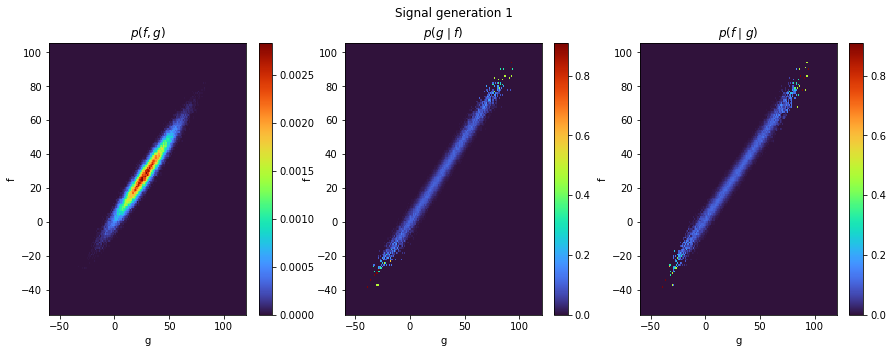

In [101]:
f = np.random.normal(27, 15, (100000,))
eps = np.random.normal(0, 4, (100000,))
A = 1
g = A * f + eps

edges_f = np.arange(-55,106)
edges_g = np.arange(-60,121)

p_f = probability_one_variable(f, edges_f)
p_g = probability_one_variable(g, edges_g)

p_f_and_g, p_f_given_g, p_g_given_f = probability_two_variables(f, g, edges_f, edges_g)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal generation 1')

im = axs[0].pcolormesh(edges_g[1:], edges_f[1:], p_f_and_g, cmap="turbo", shading="nearest")
plt.colorbar(im, ax=axs[0])
axs[0].set_title("$p(f,g)$")
axs[0].set_xlabel("g")
axs[0].set_ylabel("f")

im = axs[1].pcolormesh(edges_g[1:], edges_f[1:], p_g_given_f, cmap="turbo", shading="nearest")
plt.colorbar(im, ax=axs[1])
axs[1].set_title("$p(g\mid f)$")
axs[1].set_xlabel("g")
axs[1].set_ylabel("f")

axs[2].pcolormesh(edges_g[1:], edges_f[1:], p_f_given_g, cmap="turbo", shading="nearest")
plt.colorbar(im, ax=axs[2])
axs[2].set_title("$p(f\mid g)$")
axs[2].set_xlabel("g")
axs[2].set_ylabel("f")



In [102]:
# This cell contains hidden tests.


In [103]:
# This cell contains hidden tests.


In [104]:
# This cell contains tests.

# bins of unity width
np.testing.assert_allclose(np.sum(p_f), 1)
np.testing.assert_allclose(np.sum(p_g), 1)
np.testing.assert_allclose(np.sum(p_f_and_g), 1)

### Signal analysis 1
Calculate the corresponding distributions with $g = 20$
* *a priori* probability: $p(f)$ as a function of $f$
* likelihood probability: $p(g|f)$ as a function of $f$
* *a posteriori* probability $p(f|g)$ as a function of $f$

Display the result
* Plot *a priori* probability in the left subplot of `axs`
* Plot likelihood probability in the middle subplot of `axs`
* Plot *a posteriori* probability in the right subplot of `axs`
* Plot the maximum peak point of each probability function as a red cross in the subplots
* Show the location and value of the maximum peak point in the legend
* Add proper axis labels to the subplots
* Add proper titles to the subplots

21 [0.10390258]


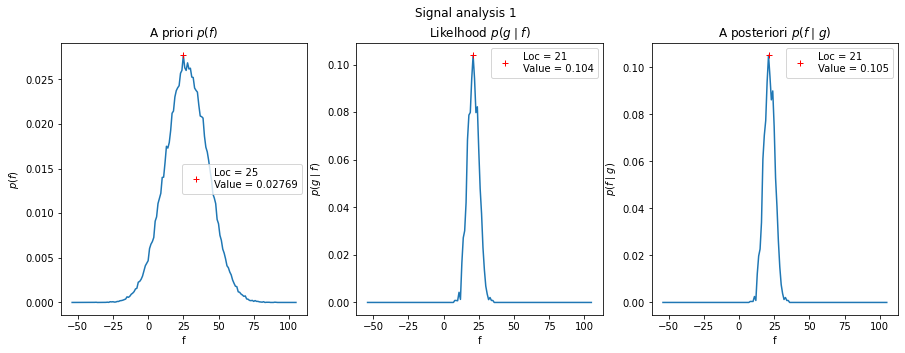

In [105]:
index, = np.where(edges_g==20)

a_priori = p_f
likelihood = p_g_given_f[:,index]
a_posteriori = p_f_given_g[:,index]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal analysis 1')

axs[0].plot(edges_f[1:], a_priori)
max_loc = edges_f[1:][np.argmax(a_priori)]
max_value = a_priori[np.argmax(a_priori)]
axs[0].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value,5)))
axs[0].set_title("A priori $p(f)$")
axs[0].set_xlabel("f")
axs[0].set_ylabel("$p(f)$")
axs[0].legend()

axs[1].plot(edges_f[1:], likelihood)
max_loc = edges_f[1:][np.argmax(likelihood)]
max_value = likelihood[np.argmax(likelihood)]
print(max_loc, max_value)
axs[1].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value[0],3)))
axs[1].set_title("Likelhood $p(g\mid f)$")
axs[1].set_xlabel("f")
axs[1].set_ylabel("$p(g\mid f)$")
axs[1].legend()


axs[2].plot(edges_f[1:], a_posteriori)
max_loc = edges_f[1:][np.argmax(a_posteriori)]
max_value = a_posteriori[np.argmax(a_posteriori)]
axs[2].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value[0],3)))
axs[2].set_title("A posteriori $p(f\mid g)$")
axs[2].set_xlabel("f")
axs[2].set_ylabel("$p(f\mid g)$")
axs[2].legend()


In [106]:
# This cell contains hidden tests.


In [107]:
# This cell contains hidden tests.


### Signal generation 2
Create the signals as follows
* $f$ is a normally distributed scalar $f \sim 0.5 \mathcal{N}(27, 15^2) + 0.5\mathcal{N}(7, 5^2)$ (using `numpy.hstack()`)
* $\epsilon$ is a normally distributed scalar $\epsilon \sim \mathcal{N}(0, 4^2)$
* $A = 1$
* Save 100,000 samples of $f$ in the variable `samples_f` (as `numpy.array`)
* Save 100,000 samples of $\epsilon$ in the variable `samples_e` (as `numpy.array`)
* Save 100,000 samples of $g$ in the variable `samples_g` (as `numpy.array`)

Calculate the corresponding distributions using the implemented functions
* Define the bin edges for $f$: $[-55, -54, -53, ..., 105]$
* Define the bin edges for $g$: $[-60, -59, -58, ..., 120]$
* Save $p(f)$ in the variable `p_f` (as `numpy.array`)
* Save $p(g)$ in the variable `p_g` (as `numpy.array`)
* Save $p(f,g)$ in the variable `p_f_and_g` (as `numpy.array`)
* Save $p(g|f)$ in the variable `p_g_given_f` (as `numpy.array`)
* Save $p(f|g)$ in the variable `p_f_given_g` (as `numpy.array`)
 
Display the result (using `matplotlib.pyplot.pcolormesh()`)
* Plot `p_f_and_g` in the left subplot of `axs`
* Plot `p_g_given_f` in the middle subplot of `axs`
* Plot `p_f_given_g` in the right subplot of `axs`
* Show the colorbar of each subplot
* Add proper axis labels to the subplots
* Add proper titles to the subplots

Text(0, 0.5, 'f')

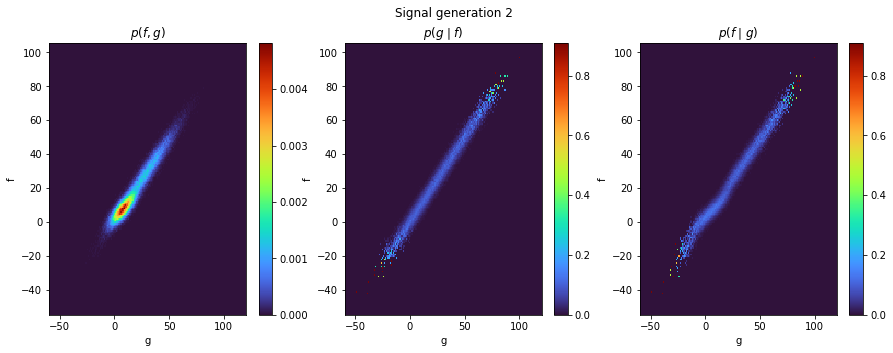

In [108]:
f = np.hstack([np.random.normal(27, 15, 50000), np.random.normal(7, 5, 50000)])
eps = np.random.normal(0, 4, 100000)
A = 1
g = A * f + eps

edges_f = np.arange(-55,106)
edges_g = np.arange(-60,121)

p_f = probability_one_variable(f, edges_f)
p_g = probability_one_variable(g, edges_g)

p_f_and_g, p_f_given_g, p_g_given_f = probability_two_variables(f, g, edges_f, edges_g)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal generation 2')

im = axs[0].pcolormesh(edges_g[1:], edges_f[1:], p_f_and_g, cmap="turbo")
plt.colorbar(im, ax=axs[0])
axs[0].set_title("$p(f,g)$")
axs[0].set_xlabel("g")
axs[0].set_ylabel("f")

im = axs[1].pcolormesh(edges_g[1:], edges_f[1:], p_g_given_f, cmap="turbo")
plt.colorbar(im, ax=axs[1])
axs[1].set_title("$p(g\mid f)$")
axs[1].set_xlabel("g")
axs[1].set_ylabel("f")

axs[2].pcolormesh(edges_g[1:], edges_f[1:], p_f_given_g, cmap="turbo")
plt.colorbar(im, ax=axs[2])
axs[2].set_title("$p(f\mid g)$")
axs[2].set_xlabel("g")
axs[2].set_ylabel("f")

In [109]:
# This cell contains hidden tests.


In [110]:
# This cell contains hidden tests.


In [111]:
# This cell contains tests.

# bins of unity width
np.testing.assert_allclose(np.sum(p_f), 1)
np.testing.assert_allclose(np.sum(p_g), 1)
np.testing.assert_allclose(np.sum(p_f_and_g), 1)

### Signal analysis 2
Calculate the corresponding distributions with $g = 20$
* *a priori* probability: $p(f)$ as a function of $f$
* likelihood probability: $p(g|f)$ as a function of $f$
* *a posteriori* probability $p(f|g)$ as a function of $f$

Display the result
* Plot *a priori* probability in the left subplot of `axs`
* Plot likelihood probability in the middle subplot of `axs`
* Plot *a posteriori* probability in the right subplot of `axs`
* Plot the maximum peak point of each probability function as a red cross in the subplots
* Show the location and value of the maximum peak point in the legend
* Add proper axis labels to the subplots
* Add proper titles to the subplots

21 [0.11442315]


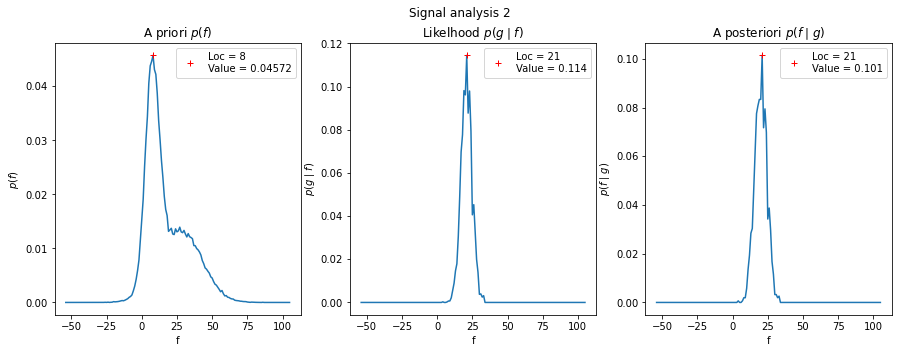

In [112]:
index, = np.where(edges_g==20)

a_priori = p_f
likelihood = p_g_given_f[:,index]
a_posteriori = p_f_given_g[:,index]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Signal analysis 2')

axs[0].plot(edges_f[1:], a_priori)
max_loc = edges_f[1:][np.argmax(a_priori)]
max_value = a_priori[np.argmax(a_priori)]
axs[0].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value,5)))
axs[0].set_title("A priori $p(f)$")
axs[0].set_xlabel("f")
axs[0].set_ylabel("$p(f)$")
axs[0].legend()

axs[1].plot(edges_f[1:], likelihood)
max_loc = edges_f[1:][np.argmax(likelihood)]
max_value = likelihood[np.argmax(likelihood)]
print(max_loc, max_value)
axs[1].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value[0],3)))
axs[1].set_title("Likelhood $p(g\mid f)$")
axs[1].set_xlabel("f")
axs[1].set_ylabel("$p(g\mid f)$")
axs[1].legend()


axs[2].plot(edges_f[1:], a_posteriori)
max_loc = edges_f[1:][np.argmax(a_posteriori)]
max_value = a_posteriori[np.argmax(a_posteriori)]
axs[2].plot(max_loc, max_value, "+", color="red", label="Loc = {} \nValue = {}".format(max_loc, np.round(max_value[0],3)))
axs[2].set_title("A posteriori $p(f\mid g)$")
axs[2].set_xlabel("f")
axs[2].set_ylabel("$p(f\mid g)$")
axs[2].legend()

In [113]:
# This cell contains hidden tests.


In [114]:
# This cell contains hidden tests.
